In [1]:
import pandas as pd

In [2]:
credits = pd.read_csv("tmdb_5000_credits.csv")
movies = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
merged_df = movies.merge(credits, left_on='id', right_on='movie_id')
print(merged_df.columns)
# merged_df['title_x'].head()



Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')


In [5]:
final_df = merged_df[['id', 'title_x', 'overview', 'genres', 'keywords', 'cast', 'crew']]
final_df = final_df.rename(columns={'title_x': 'title'})

final_df.to_csv('merged_movies_dataset.csv', index=False)

In [6]:
final_df.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
import ast

def extract_names(text):
    """
    Extract 'name' values safely from genres/keywords/cast columns.
    Returns a list of cleaned tokens.
    """
    # If already a list, skip parsing
    if isinstance(text, list):
        return [i['name'].replace(" ", "") if isinstance(i, dict) and 'name' in i else str(i).replace(" ", "") for i in text]
    
    names = []
    try:
        data = ast.literal_eval(text)
        for item in data:
            if 'name' in item:
                names.append(item['name'].replace(" ", ""))
    except:
        pass
    return names


def extract_director(text):
    """
    Simple function to extract director name
    """
    # If already a list of names (from previous run), just return it
    if isinstance(text, list) and text and isinstance(text[0], str):
        return text
    
    # Convert to Python list if it's a string
    if isinstance(text, str):
        try:
            import ast
            text = ast.literal_eval(text)
        except:
            return []
    
    # Now search for director in the list
    if isinstance(text, list):
        for person in text:
            if isinstance(person, dict) and person.get('job') == 'Director':
                return [person['name']]
    
    return []
# Apply only ONCE
final_df['genres'] = final_df['genres'].apply(extract_names)
final_df['keywords'] = final_df['keywords'].apply(extract_names)
final_df['cast'] = final_df['cast'].apply(extract_names)
final_df['crew'] = final_df['crew'].apply(extract_director)

print(final_df[['genres', 'keywords', 'cast', 'crew']].head(3))


                                         genres  \
0  [Action, Adventure, Fantasy, ScienceFiction]   
1                  [Adventure, Fantasy, Action]   
2                    [Action, Adventure, Crime]   

                                            keywords  \
0  [cultureclash, future, spacewar, spacecolony, ...   
1  [ocean, drugabuse, exoticisland, eastindiatrad...   
2  [spy, basedonnovel, secretagent, sequel, mi6, ...   

                                                cast              crew  
0  [SamWorthington, ZoeSaldana, SigourneyWeaver, ...   [James Cameron]  
1  [JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...  [Gore Verbinski]  
2  [DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...      [Sam Mendes]  


In [8]:
def collapse_features(row):
    return (
        str(row['overview']) + ' ' +
        ' '.join(row['genres']) + ' ' +
        ' '.join(row['keywords']) + ' ' +
        ' '.join(row['cast']) + ' ' +
        ' '.join(row['crew'])
    )


final_df['tags'] = final_df.apply(collapse_features, axis=1)

# print(final_df['tags'].tolist()[0])
# print(final_df['genres'].tolist()[0])
# print(final_df['keywords'].tolist()[0])
# print(final_df['cast'].tolist()[0])
# print(final_df['crew'].tolist()[0])


In [9]:
import re

# 1. Convert to lowercase
final_df['tags'] = final_df['tags'].apply(lambda x: x.lower())

# 2. Remove special characters
final_df['tags'] = final_df['tags'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# 3. Remove extra spaces
final_df['tags'] = final_df['tags'].apply(lambda x: ' '.join(x.split()))


In [10]:
# 4. (Optional but recommended) — Stemming or Lemmatization
# Reduces words to their root form, e.g. “running”, “runs”, “ran” → “run”.

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem_text(text):
    return ' '.join([ps.stem(word) for word in text.split()])

final_df['tags'] = final_df['tags'].apply(stem_text)


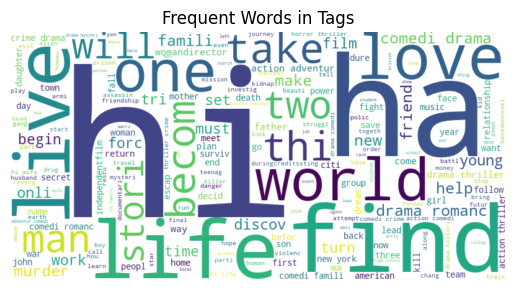

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(final_df['tags'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Frequent Words in Tags")
plt.show()


In [13]:
final_df['tags'].tolist()[0:2]

['in the 22nd centuri a parapleg marin is dispatch to the moon pandora on a uniqu mission but becom torn between follow order and protect an alien civil action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav stephenlang michellerodriguez giovanniribisi joeldavidmoor cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyt scottlawr kellykilgour jamespatrickpitt seanpatrickmurphi peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblainrozgay joncurri lukehawk woodyschultz petermensah soniaye jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibbi jodielandau julielamm cullenbmadden josephbradymadden frankietorr austinwilson sarawilson tamicawashingtonmil lucybri nathanmeist gerryblair matthewchamberlain paulyat wraywilson jamesgay

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize vectorizer
cv = CountVectorizer()

# Fit and transform the 'tags' column to create vectors
vectors = cv.fit_transform(final_df['tags']).toarray()

# Optional: see the shape (number of movies × number of unique words)
print(vectors.shape)


(4803, 78591)


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity matrix
similarity = cosine_similarity(vectors)


In [16]:
import pandas as pd

# Similarity matrix as a table
similarity_df = pd.DataFrame(similarity, index=final_df['title'], columns=final_df['title'])

# Show first 5 rows and columns
similarity_df.head()


title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,On The Downlow,Sanctuary: Quite a Conundrum,Bang,Primer,Cavite,El Mariachi,Newlyweds,"Signed, Sealed, Delivered",Shanghai Calling,My Date with Drew
title,,,,,,,,,,,,,,,,,,,,,
Avatar,1.000000,0.124030,0.090286,0.106237,0.172071,0.074058,0.097995,0.178629,0.059954,0.064468,...,0.026991,0.059942,0.110575,0.125606,0.124189,0.132870,0.073250,0.150562,0.106744,0.074060
Pirates of the Caribbean: At World's End,0.124030,1.000000,0.163093,0.158758,0.227292,0.080266,0.153416,0.308053,0.120678,0.119851,...,0.021128,0.126685,0.210205,0.234234,0.245238,0.221699,0.107508,0.193619,0.219334,0.125605
Spectre,0.090286,0.163093,1.000000,0.138108,0.134344,0.073036,0.103086,0.231216,0.076020,0.074175,...,0.017746,0.047292,0.083086,0.145733,0.128043,0.179315,0.072239,0.183839,0.149134,0.113615
The Dark Knight Rises,0.106237,0.158758,0.138108,1.000000,0.176986,0.089845,0.183670,0.256459,0.082222,0.121567,...,0.018508,0.115087,0.148035,0.202657,0.185798,0.225379,0.113013,0.235981,0.182988,0.135423
John Carter,0.172071,0.227292,0.134344,0.176986,1.000000,0.139194,0.286000,0.346669,0.139516,0.169553,...,0.082437,0.207487,0.257314,0.248233,0.385051,0.334623,0.130505,0.313869,0.307910,0.175931


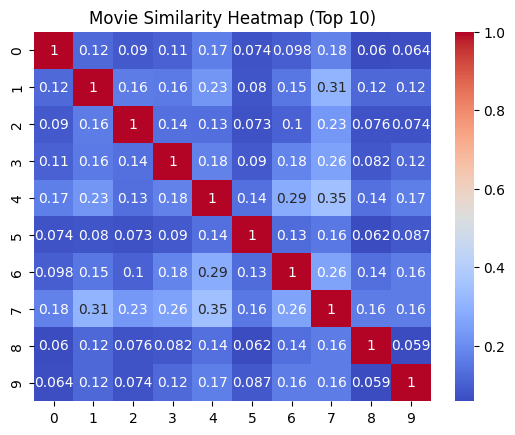

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# take a small subset, e.g., first 10 movies
subset_sim = similarity[:10, :10]
sns.heatmap(subset_sim, annot=True, cmap="coolwarm")
plt.title("Movie Similarity Heatmap (Top 10)")
plt.show()


In [18]:
import pandas as pd

# Create DataFrame from vectors
word_freq_df = pd.DataFrame(vectors, index=final_df['title'], columns=cv.get_feature_names_out())

# Show first 5 movies and first 10 words
word_freq_df.head()


,00,007,10,100,1000,100000,1000000,1000foot,10191,101yearold,...,zuzanafrenglov,zuzanageislerov,zuzu,zveescool,zvyagintsev,zwart,zwick,zwigoff,zydrunasilgauska,zyklon
title,,,,,,,,,,,,,,,,,,,,,
Avatar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pirates of the Caribbean: At World's End,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Spectre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Dark Knight Rises,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
John Carter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


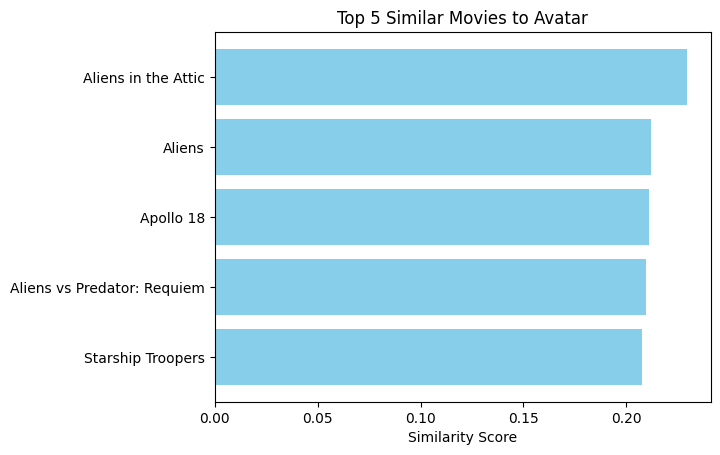

['Aliens in the Attic',
 'Aliens',
 'Apollo 18',
 'Aliens vs Predator: Requiem',
 'Starship Troopers']

In [19]:
def recommend_simple(movie_title, top_n=5):
    # Get the index of the movie in the DataFrame
    index = final_df[final_df['title'] == movie_title].index[0]
    
    # Get the similarity scores for this movie with all others
    sim_scores = list(enumerate(similarity[index]))
    
    # Sort movies based on similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Skip the first one (itself) and take top_n
    top_movies = sim_scores[1:top_n+1]
    
    # Return the titles of the top recommended movies
    recommended_titles = [final_df.iloc[i[0]].title for i in top_movies]

    # Graph:
    movie_index = index
    similar_scores = list(enumerate(similarity[movie_index]))
    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)[1:6]

    movies = [final_df.iloc[i[0]].title for i in similar_scores]
    scores = [i[1] for i in similar_scores]

    plt.barh(movies, scores, color='skyblue')
    plt.xlabel('Similarity Score')
    plt.title('Top 5 Similar Movies to Avatar')
    plt.gca().invert_yaxis()
    plt.show()

    
    return recommended_titles

recommend_simple("Avatar", top_n=5)



In [20]:
# Save your trained components
import joblib

# Save the CountVectorizer
joblib.dump(cv, "count_vectorizer.pkl")

# Save the similarity matrix  
joblib.dump(similarity, "similarity_matrix.pkl")

# Save the final_df
joblib.dump(final_df, "movie_data.pkl")

print("✅ All model files saved!")

✅ All model files saved!


In [21]:
# Load all necessary components
cv = joblib.load("count_vectorizer.pkl")
similarity = joblib.load("similarity_matrix.pkl") 
final_df = joblib.load("movie_data.pkl")

In [ ]:
user_input = {
    'movie_title': 'Avatar',  # User's favorite movie
    'top_n': 5               # How many recommendations
}

In [35]:
def recommend_movies(user_input):
    """
    Main recommendation function
    """
    movie_title = user_input['movie_title']
    top_n = user_input.get('top_n', 5)
    
    try:
        # Find movie index
        movie_index = final_df[final_df['title'] == movie_title].index[0]
        
        # Get similarity scores
        sim_scores = list(enumerate(similarity[movie_index]))
        
        # Sort by similarity
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        # Get top N recommendations (excluding itself)
        recommendations = []
        for i, (idx, score) in enumerate(sim_scores[1:top_n+1]):
            movie_data = final_df.iloc[idx]
            recommendations.append({
                'rank': i + 1,
                'title': movie_data['title'],
                'similarity_score': round(score, 3),
                'genres': movie_data['genres'],
                'overview': movie_data['overview'][:200] + '...'  # Preview
            })
        
        return {
            'success': True,
            'input_movie': movie_title,
            'recommendations': recommendations
        }
        
    except IndexError:
        return {
            'success': False,
            'error': f"Movie '{movie_title}' not found in database"
        }
    except Exception as e:
        return {
            'success': False, 
            'error': str(e)
        }

# Example usage
user_data = {'movie_title': 'Avatar', 'top_n': 5}
results = recommend_movies(user_data)
# print(type(results))
for i in results['recommendations']:
    print(i['title'])
    print(i['similarity_score'])

Aliens in the Attic
0.229
Aliens
0.212
Apollo 18
0.211
Aliens vs Predator: Requiem
0.209
Starship Troopers
0.208
